# Accessing LIBERO Dataset Samples

This notebook demonstrates how to access and explore LIBERO dataset samples.

The datasets are stored in HDF5 format. Each dataset contains multiple episodes (demonstrations) with:
- **Observations**: images (camera views), states (robot proprioception)
- **Actions**: 7-DOF robot actions
- **Metadata**: task descriptions, environment info


In [ ]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import os
import json
from pathlib import Path

# Path to downloaded datasets (adjust if you downloaded to a different location)
DATASET_DIR = "/cluster/scratch/anmari/libero_datasets"


In [2]:
import sys
sys.path.append("./meta_libero")
from libero_dataset import override_create_torch_dataset
from openpi.training import data_loader as _data_loader
import dataclasses
from openpi.training import config as _config


[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)
Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [3]:
config = _config.get_config("pi05_libero")


with override_create_torch_dataset("example", task_index=6):
    # Batch size configuration
    config = dataclasses.replace(
        config,
        batch_size=32,  # Normal training with JIT (use 4 if profiling without JIT)
    )
    data_loader = _data_loader.create_data_loader(
        config,
        sharding=None,
        shuffle=True,
    )

The dataset you requested (physical-intelligence/libero) is in 2.0 format.
While current version of LeRobot is backward-compatible with it, the version of your dataset still uses global
stats instead of per-episode stats. Update your dataset stats to the new format using this command:
```
python lerobot/common/datasets/v21/convert_dataset_v20_to_v21.py --repo-id=physical-intelligence/libero
```

If you encounter a problem, contact LeRobot maintainers on [Discord](https://discord.com/invite/s3KuuzsPFb)
or open an [issue on GitHub](https://github.com/huggingface/lerobot/issues/new/choose).

The dataset you requested (physical-intelligence/libero) is in 2.0 format.
While current version of LeRobot is backward-compatible with it, the version of your dataset still uses global
stats instead of per-episode stats. Update your dataset stats to the new format using this command:
```
python lerobot/common/datasets/v21/convert_dataset_v20_to_v21.py --repo-id=physical-intelligence/libero
```

If yo

Resolving data files:   0%|          | 0/1693 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/70 [00:00<?, ?it/s]

Filtering dataset for task_index=6...
Filtered dataset (fast): 11808 / 273465 samples
  Verifying filter correctness...
  ✓ First 3 samples verified correct


In [4]:
dataset = data_loader._data_loader._data_loader.dataset

In [5]:
dataset[-1]

{'state': array([ 0.56150573, -0.75145989,  0.64596836,  0.77712142, -0.2907378 ,
        -0.38081283,  0.1813648 , -0.20812464,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]),
 'image': {'base_0_rgb': array([[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [ 75,  75,  75],
          [ 86,  86,  86],
          [ 94,  94,  94]],
  
         [[  2,   2,   2],
          [  2,   2,   2],
          [  2,   2,   2],
          ...,
          [ 16,  16,  16],
          [ 18,  18,  18],
          [ 20,  20,  20]],
  
         [[ 12,  12,  10],
          [ 12,  12,  10],
          [ 12,  12,  10],
          ...,
          [  9,   9,   9],
         

In [10]:
# How can I check the fields of this object?
print("Type:", type(data_loader))
print("Attributes:", dir(data_loader))
# If it's a dataclass or has __dict__:
if hasattr(data_loader, "__dict__"):
    print("Fields:", data_loader.__dict__.keys())

Type: <class 'openpi.training.data_loader.DataLoaderImpl'>
Attributes: ['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_data_config', '_data_loader', '_is_protocol', '_is_runtime_protocol', 'data_config']
Fields: dict_keys(['_data_config', '_data_loader'])


In [6]:
dataset = data_loader._data_loader._data_loader.dataset
len(dataset)

9807

In [ ]:
import openpi.models.model as _model
import numpy as np
import torch

sample = dataset[0].copy()

# The error is that sample["image_mask"] entries are Python bools (scalars), not arrays.
# Convert each value to a numpy array of shape (1,) and dtype=bool
def make_obsert
if "image_mask" in sample:
    sample["image_mask"] = {
        k: np.array(v, dtype=bool)
        for k, v in sample["image_mask"].items()
    }

print(sample)

_model.Observation.from_dict(sample)

{'state': array([ 0.29397994, -0.08721764,  0.03937005,  0.84646615,  0.06224303,
        0.18128326,  0.92140456, -0.93428567,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ]), 'image': {'base_0_rgb': array([[[ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13],
        ...,
        [116, 117, 112],
        [115, 116, 111],
        [114, 115, 110]],

       [[ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13],
        ...,
        [116, 117, 112],
        [115, 116, 111],
        [114, 115, 110]],

       [[ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13],
        ...,
        [116, 117, 112],
        [115, 116, 111],
        [114, 115, 110]],

    

Observation(images={'base_0_rgb': array([[[-0.8980392 , -0.8980392 , -0.8980392 ],
        [-0.8980392 , -0.8980392 , -0.8980392 ],
        [-0.8980392 , -0.8980392 , -0.8980392 ],
        ...,
        [-0.09019607, -0.08235294, -0.12156862],
        [-0.09803921, -0.09019607, -0.12941176],
        [-0.10588235, -0.09803921, -0.1372549 ]],

       [[-0.8980392 , -0.8980392 , -0.8980392 ],
        [-0.8980392 , -0.8980392 , -0.8980392 ],
        [-0.8980392 , -0.8980392 , -0.8980392 ],
        ...,
        [-0.09019607, -0.08235294, -0.12156862],
        [-0.09803921, -0.09019607, -0.12941176],
        [-0.10588235, -0.09803921, -0.1372549 ]],

       [[-0.8980392 , -0.8980392 , -0.8980392 ],
        [-0.8980392 , -0.8980392 , -0.8980392 ],
        [-0.8980392 , -0.8980392 , -0.8980392 ],
        ...,
        [-0.09019607, -0.08235294, -0.12156862],
        [-0.09803921, -0.09019607, -0.12941176],
        [-0.10588235, -0.09803921, -0.1372549 ]],

       ...,

       [[-0.35686272, -0.5

In [11]:
len(dataset)
#next(iter(data_loader))

9807

In [22]:
batch[1].shape

(256, 10, 32)

In [17]:
sample = data_loader._data_loader._data_loader.dataset[0]
def print_shapes(prefix, d):
    for key, value in d.items():
        if isinstance(value, dict):
            print(f"{prefix}{key}: (dict)")
            print_shapes(prefix + key + ".", value)
        else:
            try:
                print(f"{prefix}{key}: shape={value.shape}, dtype={value.dtype}")
            except Exception:
                print(f"{prefix}{key}: shape={value}, dtype={type(value)}")

print_shapes("", sample)

state: shape=(32,), dtype=float64
image: (dict)
image.base_0_rgb: shape=(224, 224, 3), dtype=uint8
image.left_wrist_0_rgb: shape=(224, 224, 3), dtype=uint8
image.right_wrist_0_rgb: shape=(224, 224, 3), dtype=uint8
image_mask: (dict)
image_mask.base_0_rgb: shape=(), dtype=bool
image_mask.left_wrist_0_rgb: shape=(), dtype=bool
image_mask.right_wrist_0_rgb: shape=(), dtype=bool
actions: shape=(10, 32), dtype=float64
tokenized_prompt: shape=(200,), dtype=int64
tokenized_prompt_mask: shape=(200,), dtype=bool


In [8]:
import openpi.training.utils as training_utils

# batch = next(iter(data_loader))
batch = _6
print(f"Initialized data loader:\n{training_utils.array_tree_to_info(batch)}")


Initialized data loader:
[0].images['base_0_rgb']: (256, 224, 224, 3)@float32
[0].images['left_wrist_0_rgb']: (256, 224, 224, 3)@float32
[0].images['right_wrist_0_rgb']: (256, 224, 224, 3)@float32
[0].image_masks['base_0_rgb']: (256,)@bool
[0].image_masks['left_wrist_0_rgb']: (256,)@bool
[0].image_masks['right_wrist_0_rgb']: (256,)@bool
[0].state: (256, 32)@float32
[0].tokenized_prompt: (256, 200)@int32
[0].tokenized_prompt_mask: (256, 200)@bool
[1]: (256, 10, 32)@float32


In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import faiss
from tqdm import tqdm
import gc

def extract_image_embedding(images, image_encoder):
    """
    Extract image embeddings from pi0.5's SigLIP encoder.

    Args:
        images: numpy array of shape (N, H, W, 3) with values in [0, 255] (uint8)
        image_encoder: The SigLIP image encoder from the model

    Returns:
        Embeddings as numpy array: shape (N, embedding_dim)
    """
    # Get image tokens from encoder
    image_tokens, _ = image_encoder(images, train=False)

    # Global average pooling
    embeddings = jnp.mean(image_tokens, axis=1)

    return np.array(embeddings)


def build_faiss_index_from_dataset(
    dataset,
    image_encoder,
    batch_size=64,
    camera_view="base_0_rgb",  # or "left_wrist_0_rgb" or "right_wrist_0_rgb"
    use_all_cameras=False,  # Set True to use all 3 camera views
):
    """
    Build FAISS index from your in-memory dataset.

    Args:
        dataset: Your dataset with samples containing 'image' dict
        image_encoder: The SigLIP encoder (model.PaliGemma.img)
        batch_size: Batch size for processing
        camera_view: Which camera view to use (if use_all_cameras=False)
        use_all_cameras: If True, concatenate embeddings from all 3 cameras
    """
    print(f"Building FAISS index from {len(dataset)} samples...")
    print(f"Camera view: {'all 3 cameras' if use_all_cameras else camera_view}")

    all_embeddings = []
    metadata = []

    # Process in batches
    for start_idx in tqdm(range(0, len(dataset), batch_size)):
        end_idx = min(start_idx + batch_size, len(dataset))
        batch_samples = [dataset[i] for i in range(start_idx, end_idx)]

        if use_all_cameras:
            # Extract and concatenate embeddings from all 3 camera views
            base_images = np.stack([s['image']['base_0_rgb'] for s in batch_samples])
            left_images = np.stack([s['image']['left_wrist_0_rgb'] for s in batch_samples])
            right_images = np.stack([s['image']['right_wrist_0_rgb'] for s in batch_samples])

            base_embs = extract_image_embedding(base_images, image_encoder)
            left_embs = extract_image_embedding(left_images, image_encoder)
            right_embs = extract_image_embedding(right_images, image_encoder)

            # Concatenate embeddings from all views
            batch_embeddings = np.concatenate([base_embs, left_embs, right_embs], axis=1)
        else:
            # Use only one camera view
            images = np.stack([s['image'][camera_view] for s in batch_samples])
            batch_embeddings = extract_image_embedding(images, image_encoder)

        all_embeddings.append(batch_embeddings)

        # Store metadata
        for local_idx, sample_idx in enumerate(range(start_idx, end_idx)):
            metadata.append({
                'sample_idx': sample_idx,
                'state': batch_samples[local_idx]['state'],
                'actions': batch_samples[local_idx]['actions'],
            })

        # Clear cache periodically
        if end_idx % 500 == 0:
            jax.clear_caches()
            gc.collect()

    # Concatenate all embeddings
    embeddings_array = np.concatenate(all_embeddings, axis=0).astype(np.float32)
    print(f"Embeddings array shape: {embeddings_array.shape}")

    # Normalize for cosine similarity
    faiss.normalize_L2(embeddings_array)

    # Create FAISS index
    embedding_dim = embeddings_array.shape[1]
    print(f"Creating FAISS index with dimension {embedding_dim}...")
    index = faiss.IndexFlatIP(embedding_dim)  # Inner product (cosine similarity after normalization)
    index.add(embeddings_array)

    print(f"FAISS index created with {index.ntotal} vectors")

    return index, metadata, embeddings_array


# Usage in your notebook:
# Assuming you have:
# - dataset: your dataset from data_loader._data_loader._data_loader.dataset
# - model: your loaded pi0.5 model
# - image_encoder = model.PaliGemma.img

# Build the index
index, metadata, embeddings = build_faiss_index_from_dataset(
    dataset=dataset,
    image_encoder=model.PaliGemma.img,
    batch_size=64,
    camera_view="base_0_rgb",  # Choose which camera
    use_all_cameras=False,  # Set True to use all 3 cameras
)

# Save if needed
import pickle
faiss.write_index(index, "my_faiss_index.index")
with open("my_faiss_metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)

print("Index saved!")

In [24]:
libero_90_path = Path(DATASET_DIR) / "libero_90"
hdf5_files = sorted(list(libero_90_path.glob("*.hdf5")))
task_id=0
task_file = hdf5_files[task_id]
print(f"\nLoading task {task_id}: {task_file.name}")


# Example name KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5
# Prompt is: close the top drawer of the cabinet and put the black bowl on top of it

def extract_prompt_from_filename(name: str) -> str:
    """
    Extracts the prompt (task description) from a LIBERO HDF5 filename.
    Example:
        filename = 'KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5'
        returns 'close the top drawer of the cabinet and put the black bowl on top of it'
    """
    import re
    assert name.endswith('_demo.hdf5')
    # Remove 'KITCHEN_SCENE' followed by digits and an underscore at the start
    prompt = re.sub(r'^[A-Z_]+_SCENE\d+_', '', name)
    prompt = re.sub(r'_demo\.hdf5$', '', prompt).replace('_', ' ')
    return prompt


Loading task 0: KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5


In [25]:
libero_90_path = Path(DATASET_DIR) / "libero_90"
hdf5_files = sorted(list(libero_90_path.glob("*.hdf5")))

print([extract_prompt_from_filename(file.name) for file in hdf5_files])

['close the top drawer of the cabinet and put the black bowl on top of it', 'close the top drawer of the cabinet', 'put the black bowl in the top drawer of the cabinet', 'put the butter at the back in the top drawer of the cabinet and close it', 'put the butter at the front in the top drawer of the cabinet and close it', 'put the chocolate pudding in the top drawer of the cabinet and close it', 'open the bottom drawer of the cabinet', 'open the top drawer of the cabinet and put the bowl in it', 'open the top drawer of the cabinet', 'put the black bowl on the plate', 'put the black bowl on top of the cabinet', 'open the top drawer of the cabinet', 'put the black bowl at the back on the plate', 'put the black bowl at the front on the plate', 'put the middle black bowl on the plate', 'put the middle black bowl on top of the cabinet', 'stack the black bowl at the front on the black bowl in the middle', 'stack the middle black bowl on the back black bowl', 'put the frying pan on the stove',

In [1]:
def load_task_episodes(task_id: int):
    """Load episodes for a specific task from libero_90."""
    DATASET_DIR = "/cluster/scratch/anmari/libero_datasets"
    libero_90_path = Path(DATASET_DIR) / "libero_90"
    hdf5_files = sorted(list(libero_90_path.glob("*.hdf5")))

    if not hdf5_files:
        raise ValueError("No HDF5 files found in libero_90!")

    if task_id >= len(hdf5_files):
        raise ValueError(f"Task ID {task_id} out of range. Only {len(hdf5_files)} tasks available.")

    task_file = hdf5_files[task_id]
    print(f"\nLoading task {task_id}: {task_file.name}")

    # Load all episodes from the task
    episodes = []
    with h5py.File(task_file, "r") as f:
        demo_keys = [key for key in f["data"].keys() if key.startswith("demo_")]
        for demo_key in demo_keys:
            demo_data = f["data"][demo_key]
            episode = {
                'observations': {},
                'actions': np.array(demo_data['actions']),
            }
            # Load all camera views
            for camera_view in ['agentview_rgb', 'eye_in_hand_rgb']:
                if camera_view in demo_data['obs']:
                    episode['observations'][camera_view] = np.array(demo_data['obs'][camera_view])
            episodes.append(episode)

    print(f"Loaded {len(episodes)} episodes from task {task_id}")
    return episodes

## Helper Functions


## Create an animation of the episode

Optionally create an animated visualization showing the episode progression.


In [9]:
# Install faiss in the current kernel's environment
# This ensures faiss is installed in the same Python environment as the kernel
import sys
import subprocess

try:
    import faiss
    print(f"faiss already installed in: {sys.executable}")
except ImportError:
    print(f"Installing faiss-cpu in kernel environment: {sys.executable}")

    # First, ensure pip is available (bootstrap if needed)
    try:
        import pip
    except ImportError:
        print("Bootstrapping pip...")
        subprocess.check_call([sys.executable, "-m", "ensurepip", "--upgrade", "--default-pip"])

    # Now install faiss-cpu
    print("Installing faiss-cpu...")
    result = subprocess.run(
        [sys.executable, "-m", "pip", "install", "faiss-cpu"],
        capture_output=True,
        text=True
    )

    if result.returncode != 0:
        print(f"Installation failed. Error output:")
        print(result.stderr)
        raise RuntimeError(f"Failed to install faiss-cpu: {result.stderr}")

    print("faiss-cpu installed successfully!")
    import faiss

print(f"faiss version: {faiss.__version__ if hasattr(faiss, '__version__') else 'unknown'}")


Installing faiss-cpu in kernel environment: /cluster/home/anmari/meta_vlas/.venv/bin/python
Bootstrapping pip...
Looking in links: /scratch/tmp.53714536.anmari/tmpe8i14g0l
Processing /scratch/tmp.53714536.anmari/tmpe8i14g0l/pip-23.2.1-py3-none-any.whl
Installing faiss-cpu...
faiss-cpu installed successfully!
faiss version: 1.13.2


## FAISS Similarity Search with pi0.5 Embeddings

This section creates a FAISS index of all frames from libero_90 dataset using image embeddings from the pi0.5 model, then queries it with the first example from libero_10.


In [2]:
# Import functions from build_faiss_index_incremental.py
import sys
from pathlib import Path

# Add the libero examples directory to path to import from the script
# The script is in examples/libero/, and notebook is in examples/
notebook_dir = Path.cwd()  # Current working directory (should be examples/)
print(f"Notebook directory: {notebook_dir}")
libero_dir = notebook_dir / "examples" / "libero"
if str(libero_dir) not in sys.path:
    sys.path.insert(0, str(libero_dir))

from build_faiss_index_incremental import load_model, extract_image_embedding, extract_text_embedding, clear_jax_cache

# Load pi0.5 model for extracting image embeddings
print("Loading pi0.5 model...")
image_encoder, text_encoder, tokenizer = load_model()
print("Model loaded successfully!")
print(f"Image encoder type: {type(image_encoder)}")


Notebook directory: /cluster/home/anmari/meta_vlas
Loading pi0.5 model...
Loading pi0.5 model...
Loading model weights...


Loading tokenizer...
Model loaded successfully!
Model loaded successfully!
Image encoder type: <class 'flax.nnx.bridge.wrappers.ToNNX'>


## Query FAISS Index with First Task from libero_90

Load the created FAISS index and query it using the first image and task description from the first task in libero_90.


In [3]:
# Load FAISS index and query with first task from libero_90
import pickle
import faiss
import matplotlib.pyplot as plt
from pathlib import Path

# Load the FAISS index if not already loaded
cache_dir = Path.home() / ".cache" / "libero_faiss"
index_path = cache_dir / "libero_90_faiss_index.index"
metadata_path = cache_dir / "libero_90_faiss_metadata.pkl"

if 'index' not in locals() or index is None:
    if index_path.exists() and metadata_path.exists():
        print("Loading FAISS index from cache...")
        index_cpu = faiss.read_index(str(index_path))
        with open(metadata_path, "rb") as f:
            metadata = pickle.load(f)
        print(f"Loaded index with {index_cpu.ntotal} embeddings")
        print(f"Loaded metadata for {len(metadata)} entries")

        # Keep index on CPU (using faiss-cpu)
        index = index_cpu
        print("Index is on CPU")
    else:
        print(f"ERROR: Index not found at {index_path}")
        print("Please run the index creation cell first.")
        index = None
        metadata = []
else:
    print("Using already loaded index")
    if 'metadata' not in locals():
        # Load metadata if index was loaded but metadata wasn't
        if metadata_path.exists():
            with open(metadata_path, "rb") as f:
                metadata = pickle.load(f)
            print(f"Loaded metadata for {len(metadata)} entries")
        else:
            print("ERROR: Metadata not found!")
            metadata = []


Loading FAISS index from cache...
Loaded index with 669043 embeddings
Loaded metadata for 669043 entries
Index is on CPU


In [4]:
# Get first image and task description from first task in libero_90
if index is not None:
    print("\n" + "="*60)
    print("Loading first task from libero_90...")
    print("="*60)

    libero_90_path = Path(DATASET_DIR) / "libero_90"
    hdf5_files_90 = sorted(list(libero_90_path.glob("*.hdf5")))

    if not hdf5_files_90:
        print("ERROR: No libero_90 HDF5 files found!")
        query_from_90 = None
    else:
        first_file = hdf5_files_90[0]
        print(f"First file: {first_file.name}")

        with h5py.File(first_file, "r") as f:
            # Get task description
            problem_info = json.loads(f["data"].attrs.get("problem_info", "{}"))
            language_instruction = "".join(problem_info.get("language_instruction", []))
            print(f"\nTask description: {language_instruction}")

            # Get first episode
            demos = sorted([k for k in f["data"].keys() if k.startswith("demo_")])
            if demos:
                inds = np.argsort([int(elem[5:]) for elem in demos])
                demos = [demos[i] for i in inds]

            if demos:
                first_demo_key = demos[0]
                demo_data = f["data"][first_demo_key]

                # Get first image from agentview_rgb
                camera_view = "agentview_rgb"
                if "obs" in demo_data and camera_view in demo_data["obs"]:
                    images = np.array(demo_data["obs"][camera_view])
                    first_image = images[0]  # First frame of first episode

                    # Ensure image is in [0, 255] range
                    if first_image.max() <= 1.0:
                        first_image = (first_image * 255).astype(np.uint8)
                    else:
                        first_image = first_image.astype(np.uint8)

                    print(f"\nFirst image shape: {first_image.shape}")
                    print(f"First image dtype: {first_image.dtype}")
                    print(f"First image range: [{first_image.min()}, {first_image.max()}]")

                    query_from_90 = {
                        "image": first_image,
                        "task_description": language_instruction,
                        "file_name": first_file.name,
                        "episode_idx": 0,
                        "demo_key": first_demo_key,
                        "step_idx": 0,
                        "camera_view": camera_view
                    }
                else:
                    print(f"ERROR: {camera_view} not found in observations!")
                    query_from_90 = None
            else:
                print("ERROR: No demos found in file!")
                query_from_90 = None
else:
    print("ERROR: FAISS index not available!")
    query_from_90 = None



Loading first task from libero_90...
First file: KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5

Task description: close the top drawer of the cabinet and put the black bowl on top of it

First image shape: (128, 128, 3)
First image dtype: uint8
First image range: [0, 255]


In [5]:
# Extract embedding from the query image and query the FAISS index
# NOTE: The index was built with concatenated image + text embeddings, so we need to do the same
if index is not None and query_from_90 is not None:
    print("\n" + "="*60)
    print("Extracting embedding and querying FAISS index...")
    print("="*60)


    # Extract image embedding
    query_image = query_from_90["image"]
    query_img_embedding = extract_image_embedding(query_image, image_encoder)
    print(f"Image embedding shape: {query_img_embedding.shape}")

    # Extract text embedding from task description
    task_description = query_from_90["task_description"]
    if task_description:
        query_text_embedding = extract_text_embedding(task_description, tokenizer, text_encoder)
        print(f"Text embedding shape: {query_text_embedding.shape}")

        # Concatenate image and text embeddings (same as how index was built)
        query_embedding = np.concatenate([query_img_embedding, query_text_embedding])
        print(f"Concatenated embedding shape: {query_embedding.shape}")
    else:
        print("Warning: No task description found, using image embedding only")
        query_embedding = query_img_embedding

    # Normalize for cosine similarity
    query_embedding = query_embedding.astype(np.float32)
    query_embedding = query_embedding / np.linalg.norm(query_embedding)
    print(f"Query embedding normalized")

    # Query the index
    k = 10  # Number of nearest neighbors
    query_emb_reshaped = query_embedding.reshape(1, -1)  # Add batch dimension

    print(f"Final query embedding shape: {query_emb_reshaped.shape}")

    print(f"\nSearching for top {k} similar frames...")
    distances, indices = index.search(query_emb_reshaped, k)

    # Display results
    print(f"\n{'='*60}")
    print(f"Top {k} Similar Frames Retrieved:")
    print(f"{'='*60}")
    print(f"Query: {query_from_90['file_name']} | Episode 0 | Step 0 | {query_from_90['camera_view']}")
    print(f"Task: {query_from_90['task_description']}")
    print(f"\n{'Rank':<6} {'Distance':<12} {'File':<50} {'Episode':<8} {'Step':<6} {'Camera':<15}")
    print("-" * 100)

    results_90 = []
    for i, (dist, idx) in enumerate(zip(distances[0], indices[0])):
        meta = metadata[idx]
        results_90.append({
            'rank': i + 1,
            'distance': dist,
            'metadata': meta
        })
        print(f"{i+1:<6} {dist:<12.4f} {meta['file_name']:<50} {meta['episode_idx']:<8} {meta['step_idx']:<6} {meta['camera_view']:<15}")

    print(f"\n{'='*60}")
    print("Query completed!")
    print(f"{'='*60}")
else:
    print("ERROR: Cannot query - index or query data not available!")
    results_90 = None



Extracting embedding and querying FAISS index...
Image embedding shape: (2048,)
Text embedding shape: (2048,)
Concatenated embedding shape: (4096,)
Query embedding normalized
Final query embedding shape: (1, 4096)

Searching for top 10 similar frames...

Top 10 Similar Frames Retrieved:
Query: KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5 | Episode 0 | Step 0 | agentview_rgb
Task: close the top drawer of the cabinet and put the black bowl on top of it

Rank   Distance     File                                               Episode  Step   Camera         
----------------------------------------------------------------------------------------------------
1      1.0000       KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5 0        0      agentview_rgb  
2      1.0000       KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5 0        1      ag


Visualizing Query Results


/scratch/tmp.53761752.anmari/ipykernel_1371052/2342693756.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


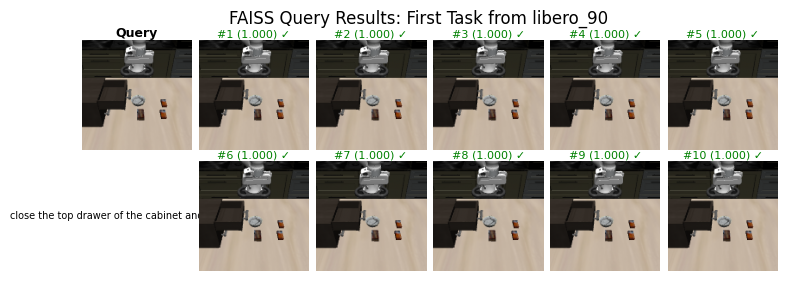


Displayed query image and top 10 similar images from libero_90

Analysis:
  - Query was from: KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5
  - Retrieved 10 similar frames
  - Distance range: [1.0000, 0.9999]
  - Results from same file: 10/10
  - Results from same episode: 10/10


In [ ]:
# Visualize query results - arranged in 2 rows with minimal whitespace
if results_90 is not None and query_from_90 is not None:
    print("\n" + "="*60)
    print("Visualizing Query Results")
    print("="*60)

    # Load top-k similar images
    top_k = min(10, len(results_90))  # Show top 10
    similar_images = []
    similar_meta = []

    libero_90_path = Path(DATASET_DIR) / "libero_90"

    for result in results_90[:top_k]:
        meta = result['metadata']
        file_path = libero_90_path / meta['file_name']

        with h5py.File(file_path, "r") as f:
            demo_data = f["data"][meta['demo_key']]
            image = np.array(demo_data["obs"][meta['camera_view']][meta['step_idx']])

            # Normalize if needed
            if image.max() <= 1.0:
                image = (image * 255).astype(np.uint8)
            image = image / 255.0  # Convert to [0, 1] for display

            similar_images.append(image)
            similar_meta.append({
                'meta': meta,
                'distance': result['distance']
            })

    # Prepare query image for display
    query_img_display = query_from_90["image"].copy()
    if query_img_display.max() > 1.0:
        query_img_display = query_img_display / 255.0

    # Arrange in 2 rows: 5 images per row
    # Row 0: Query + results 0-4 (5 results)
    # Row 1: Task description + results 5-9 (5 results)
    num_cols = 6  # Query/task column + 5 result columns

    # Create visualization with 2 rows, minimal whitespace
    fig, axes = plt.subplots(2, num_cols, figsize=(num_cols * 1.5, 3),
                            gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
    fig.suptitle(f'FAISS Query Results: First Task from libero_90', fontsize=12, y=0.98)

    # Row 0: Query image + first 5 results (indices 0-4)
    # Show query image in first column
    axes[0, 0].imshow(np.flipud(query_img_display))
    axes[0, 0].set_title('Query', fontsize=9, fontweight='bold', pad=2)
    axes[0, 0].axis('off')

    # Show first 5 results in row 0 (indices 0-4)
    for i in range(min(5, top_k)):
        img = similar_images[i]
        info = similar_meta[i]
        axes[0, i+1].imshow(np.flipud(img))
        axes[0, i+1].set_title(f'#{i+1} ({info["distance"]:.3f})', fontsize=8, pad=2)
        axes[0, i+1].axis('off')

    # Row 1: Task description + next 5 results (indices 5-9)
    # Show task description in first column
    task_text = query_from_90['task_description'][:50] + "..." if len(query_from_90['task_description']) > 50 else query_from_90['task_description']
    axes[1, 0].text(0.5, 0.5, task_text, ha='center', va='center',
                    fontsize=7, transform=axes[1, 0].transAxes, wrap=True)
    axes[1, 0].axis('off')

    # Show next 5 results in row 1 (indices 5-9)
    for i in range(5, min(10, top_k)):
        img = similar_images[i]
        info = similar_meta[i]
        col_idx = i - 5 + 1  # Column index: 1, 2, 3, 4, 5
        axes[1, col_idx].imshow(np.flipud(img))
        axes[1, col_idx].set_title(f'#{i+1} ({info["distance"]:.3f})', fontsize=8, pad=2)
        axes[1, col_idx].axis('off')

    # Hide unused subplots if top_k < 10
    if top_k < 10:
        for i in range(top_k + 1, num_cols):
            axes[0, i].axis('off')
            axes[1, i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print(f"\nDisplayed query image and top {top_k} similar images from libero_90")
    print(f"\nAnalysis:")
    print(f"  - Query was from: {query_from_90['file_name']}")
    print(f"  - Retrieved {len(results_90)} similar frames")
    print(f"  - Distance range: [{results_90[0]['distance']:.4f}, {results_90[-1]['distance']:.4f}]")

    # Check if any results are from the same file/episode
    same_file_count = sum(1 for r in results_90 if r['metadata']['file_name'] == query_from_90['file_name'])
    same_episode_count = sum(1 for r in results_90 if (r['metadata']['file_name'] == query_from_90['file_name'] and
                                                        r['metadata']['episode_idx'] == query_from_90['episode_idx']))
    print(f"  - Results from same file: {same_file_count}/{len(results_90)}")
    print(f"  - Results from same episode: {same_episode_count}/{len(results_90)}")
else:
    print("ERROR: Cannot visualize - results not available!")


## Evaluate Pretrained Model on First Task of libero_90

Evaluate the pretrained model directly (without client/server architecture) on the first task of libero_90.


In [ ]:
import sys
sys.path.append("third_party/libero")
from openpi.policies import policy_config as _policy_config
from openpi.training import config as _config


CHECKPOINT_CONFIG = "pi05_libero"
CHECKPOINT_DIR = "gs://openpi-assets/checkpoints/pi05_libero"



# Load the policy
print("Loading policy from checkpoint...")
train_config = _config.get_config(CHECKPOINT_CONFIG)
policy = _policy_config.create_trained_policy(train_config, CHECKPOINT_DIR)
print("Policy loaded successfully!")


Loading policy from checkpoint...


Policy loaded successfully!


In [6]:
# Evaluate policy before fine-tuning
sys.path.append("./meta_libero")

from utils import run_evaluation

run_evaluation(
    policy=policy,
    task_id=0,
    num_trials=50,
    save_video=False
)


Starting evaluation: 50 trials...
Task suite: libero_90
Evaluating task 0 of 90
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
Task: close the top drawer of the cabinet


Task 0:   0%|          | 0/50 [00:00<?, ?it/s]

Episode 1 of 50


  Episodes: 1, Successes: 0 (0.0%)
Episode 2 of 50
  Episodes: 2, Successes: 1 (50.0%)
Episode 3 of 50
  Episodes: 3, Successes: 1 (33.3%)
Episode 4 of 50
  Episodes: 4, Successes: 1 (25.0%)
Episode 5 of 50
  Episodes: 5, Successes: 1 (20.0%)
Episode 6 of 50
  Episodes: 6, Successes: 2 (33.3%)
Episode 7 of 50
  Episodes: 7, Successes: 2 (28.6%)
Episode 8 of 50
  Episodes: 8, Successes: 2 (25.0%)
Episode 9 of 50
  Episodes: 9, Successes: 2 (22.2%)
Episode 10 of 50
  Episodes: 10, Successes: 3 (30.0%)
Episode 11 of 50
  Episodes: 11, Successes: 3 (27.3%)
Episode 12 of 50
  Episodes: 12, Successes: 3 (25.0%)
Episode 13 of 50
  Episodes: 13, Successes: 3 (23.1%)
Episode 14 of 50
  Episodes: 14, Successes: 4 (28.6%)
Episode 15 of 50
  Episodes: 15, Successes: 4 (26.7%)
Episode 16 of 50
  Episodes: 16, Successes: 4 (25.0%)
Episode 17 of 50
  Episodes: 17, Successes: 4 (23.5%)
Episode 18 of 50
  Episodes: 18, Successes: 5 (27.8%)
Episode 19 of 50
  Episodes: 19, Successes: 5 (26.3%)
Episode 2

## Finetuning

In [7]:
## Fine-tune Model on First Task from libero_90

import h5py
import numpy as np
from pathlib import Path
from typing import Iterator, Tuple
import jax.numpy as jnp
import sys
sys.path.append("./meta_libero")

import openpi.models.model as _model
from openpi.shared import image_tools
from openpi.models.model import IMAGE_RESOLUTION
from utils import train_model_on_fly

if "model" not in locals():
    # Load the full model (not just encoders)
    print("Loading full model for fine-tuning...")
    from openpi.training import config as _config
    from openpi.models import model as _model
    import openpi.shared.download as download

    train_config = _config.get_config("pi05_libero")
    checkpoint_dir = download.maybe_download("gs://openpi-assets/checkpoints/pi05_libero")
    model = train_config.model.load(_model.restore_params(checkpoint_dir / "params", dtype=jnp.bfloat16))
    print("Model loaded successfully!")

if "all_episodes" not in locals():
    # Load first task from libero_90
    DATASET_DIR = "/cluster/scratch/anmari/libero_datasets"
    libero_90_path = Path(DATASET_DIR) / "libero_90"
    hdf5_files = sorted(list(libero_90_path.glob("*.hdf5")))

    if not hdf5_files:
        raise ValueError("No HDF5 files found in libero_90!")

    first_task_file = hdf5_files[0]
    print(f"\nFine-tuning on first task: {first_task_file.name}")

    # Load all episodes from the first task
    def load_all_episodes(hdf5_path):
        """Load all episodes from an HDF5 file."""
        episodes = []
        with h5py.File(hdf5_path, "r") as f:
            demo_keys = [key for key in f["data"].keys() if key.startswith("demo_")]
            for demo_key in demo_keys:
                demo_data = f["data"][demo_key]
                episode = {
                    'observations': {},
                    'actions': np.array(demo_data['actions']),
                }
                # Load all camera views
                for camera_view in ['agentview_rgb', 'eye_in_hand_rgb']:
                    if camera_view in demo_data['obs']:
                        episode['observations'][camera_view] = np.array(demo_data['obs'][camera_view])
                episodes.append(episode)
        return episodes

    all_episodes = load_all_episodes(first_task_file)
    print(f"Loaded {len(all_episodes)} episodes from first task")

# Convert LIBERO data to model format
def convert_to_model_format(episodes, batch_size=64):
    """
    Convert LIBERO episodes to model's Observation and Actions format.
    Returns an iterator of (observation, actions) tuples.
    """
    # Flatten all episodes into a sequence of (obs, action) pairs
    all_obs = []
    all_actions = []

    for episode in episodes:
        # Get the length from actions (should match observations)
        episode_len = len(episode['actions'])

        # Process each timestep
        for t in range(episode_len):
            # Prepare observation dict with images
            obs_dict = {}
            for camera_view, images in episode['observations'].items():
                # Get image at timestep t
                img = images[t]  # Shape: (H, W, 3)

                # Normalize to [0, 255] if needed
                if img.max() <= 1.0:
                    img = (img * 255).astype(np.uint8)
                else:
                    img = img.astype(np.uint8)

                # Resize to model's expected size (224, 224)
                img_resized = image_tools.resize_with_pad(img, IMAGE_RESOLUTION[0], IMAGE_RESOLUTION[1])

                # Convert to float32 and normalize to [-1, 1]
                img_normalized = img_resized.astype(jnp.float32) / 255.0 * 2.0 - 1.0

                obs_dict[camera_view] = img_normalized

            # Get action at timestep t
            action = episode['actions'][t]  # Shape: (7,)

            all_obs.append(obs_dict)
            all_actions.append(action)

    # Create batches
    num_samples = len(all_obs)
    print(f"Total samples: {num_samples}")

    for i in range(0, num_samples, batch_size):
        batch_end = min(i + batch_size, num_samples)
        batch_obs = all_obs[i:batch_end]
        batch_actions = np.array(all_actions[i:batch_end])

        # Stack observations into batch format
        # Map LIBERO camera views to model's expected camera view names
        # Model expects: "base_0_rgb", "left_wrist_0_rgb", "right_wrist_0_rgb"
        # LIBERO provides: "agentview_rgb", "eye_in_hand_rgb"
        obs_batch = {}
        obs_masks = {}

        # Map agentview_rgb -> base_0_rgb (overhead/base camera)
        if 'agentview_rgb' in batch_obs[0]:
            images = jnp.stack([obs['agentview_rgb'] for obs in batch_obs])
            obs_batch['base_0_rgb'] = images
            obs_masks['base_0_rgb'] = jnp.ones(len(batch_obs), dtype=jnp.bool_)

        # Map eye_in_hand_rgb -> left_wrist_0_rgb (wrist camera)
        if 'eye_in_hand_rgb' in batch_obs[0]:
            images = jnp.stack([obs['eye_in_hand_rgb'] for obs in batch_obs])
            obs_batch['left_wrist_0_rgb'] = images
            obs_masks['left_wrist_0_rgb'] = jnp.ones(len(batch_obs), dtype=jnp.bool_)
            # Also use the same image for right_wrist_0_rgb (model expects 3 cameras)
            obs_batch['right_wrist_0_rgb'] = images  # Duplicate for right wrist
            obs_masks['right_wrist_0_rgb'] = jnp.ones(len(batch_obs), dtype=jnp.bool_)

        # Get state (robot proprioception) - use zeros if not available
        # LIBERO doesn't provide state, so we'll use zeros
        # Model expects state with shape (batch, action_dim) where action_dim=32
        batch_size_actual = len(batch_obs)
        model_action_dim = 32  # Model expects state_dim = action_dim = 32
        state = jnp.zeros((batch_size_actual, model_action_dim), dtype=jnp.float32)

        # Create Observation object
        observation = _model.Observation(
            images=obs_batch,
            image_masks=obs_masks,
            state=state,
            tokenized_prompt=None,
            tokenized_prompt_mask=None,
        )

        # Create Actions object
        # Actions is a type alias for Float[ArrayT, "*b ah ad"]
        # Shape should be (batch, action_horizon, action_dim)
        # LIBERO actions are (7,) per timestep, but model expects action_dim=32
        action_horizon = 10  # From pi05_libero config
        libero_action_dim = 7  # LIBERO action dimension
        model_action_dim = 32  # Model expects action_dim=32 (from pi05_libero config default)

        # Expand single timestep actions to action_horizon
        # Repeat the action for action_horizon timesteps
        batch_size_actual = len(batch_actions)
        actions_expanded = jnp.repeat(
            batch_actions[:, None, :],  # (batch, 1, libero_action_dim=7)
            action_horizon,  # Repeat 10 times
            axis=1  # Along the action_horizon dimension
        )  # Shape: (batch, action_horizon, libero_action_dim=7)

        # Pad actions from 7 to 32 dimensions (model expects action_dim=32)
        # Pad with zeros for the extra dimensions
        padding_size = model_action_dim - libero_action_dim
        actions_padded = jnp.pad(
            actions_expanded,
            pad_width=((0, 0), (0, 0), (0, padding_size)),  # Pad last dimension
            mode='constant',
            constant_values=0.0
        )  # Shape: (batch, action_horizon, model_action_dim=32)

        # Actions is just a JAX array, not a class
        actions = jnp.array(actions_padded, dtype=jnp.float32)

        yield observation, actions

# Create training iterator - keep it lazy to avoid loading all batches into GPU memory
# Don't convert to list - keep as generator to create batches on-demand
def make_training_iterator():
    """Returns a new iterator over training batches. Creates batches on-demand."""
    while True:  # Infinite loop to restart when exhausted
        for batch in convert_to_model_format(all_episodes, batch_size=64):
            yield batch

training_iterator = make_training_iterator()

# Count batches for info (this will consume the iterator once, but that's ok for counting)
print("Counting training batches...")
batch_count = sum(1 for _ in convert_to_model_format(all_episodes, batch_size=64))
print(f"Total training batches: {batch_count}\n")

# Fine-tune the model
print("\nStarting fine-tuning...")
print("Training hyperparameters:")
print(f"  Learning rate: 2.5e-5")
print(f"  Number of steps: 500")
print(f"  Batch size: 64")
print(f"  Warmup steps: 50")

trained_model, train_losses  = train_model_on_fly(
    model=model,
    training_set=training_iterator,
    learning_rate=2.5e-5,
    num_steps=100,  # Adjust based on your needs
    batch_size=64,
    warmup_steps=50,
    weight_decay=0.0,
    log_interval=50,
    seed=42,
)

print("\nFine-tuning completed!")
print(f"Trained model type: {type(trained_model)}")

Loading full model for fine-tuning...


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires n

Model loaded successfully!

Fine-tuning on first task: KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet_and_put_the_black_bowl_on_top_of_it_demo.hdf5
Loaded 50 episodes from first task
Counting training batches...
Total samples: 10662
Total training batches: 167


Starting fine-tuning...
Training hyperparameters:
  Learning rate: 2.5e-5
  Number of steps: 500
  Batch size: 64
  Warmup steps: 50
Number of trainable parameters: 3,353,433,872


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/beartype/_util/error/utilerrwarn.py:105: BeartypeDecorHintPep585DeprecationWarning: Method openpi.training.utils.TrainState() parameter "params" PEP 484 type hint typing.Hashable deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". For further commentary and alternatives, see also:
    https://beartype.readthedocs.io/en/latest/api_roar/#pep-585-deprecations
  warn(message, cls)
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/beartype/_util/error/utilerrwarn.py:105: BeartypeDecorHintPep585DeprecationWarning: Method openpi.training.utils.TrainState() parameter "opt_state" PEP 484 type hint typing.Iterable[ForwardRef('ArrayTree')] deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve thi

Training:   0%|                                                                       | 0/100 [00:00<?, ?it/s]

Compiling training step (this may take a few minutes)...
Total samples: 10662


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo obje

Compilation complete! Starting training...


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo obje

Step 0: loss=0.0390, grad_norm=0.6094
Step 50: loss=0.0439, grad_norm=0.4286
Step 99: loss=0.0210, grad_norm=0.2500

Training completed! Final loss: 0.0192

Fine-tuning completed!
Trained model type: <class 'openpi.models.pi0.Pi0'>


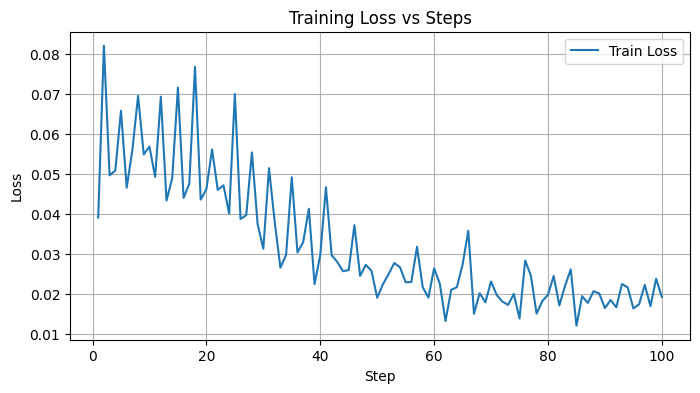

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot([i+1 for i in range(len(train_losses))], train_losses, label='Train Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss vs Steps')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
import gc
import jax

def clear_gpu_memory():
    """Clear GPU memory without resetting the kernel."""
    # Force garbage collection
    gc.collect()

    # Clear JAX device memory (this is the key for GPU memory)
    for device in jax.devices():
        if hasattr(device, 'client'):
            # For TPU/GPU devices with a client
            try:
                device.client.clear_cache()
            except:
                pass
        # Try to clear cache if the method exists
        if hasattr(device, 'clear_cache'):
            try:
                device.clear_cache()
            except:
                pass

    # Clear JAX's internal caches (compilation cache, etc.)
    try:
        # Clear compilation cache
        jax._src.api._clear_caches()
    except:
        pass

    # Additional cleanup: try to clear XLA cache
    try:
        from jax._src import xla_bridge
        xla_bridge.get_backend.cache_clear()
    except:
        pass

    print("GPU memory cleared!")

# Run it
clear_gpu_memory()

GPU memory cleared!


In [9]:
# Create a policy from the model
#import importlib
#import utils
#importlib.reload(utils)
from utils import create_policy
from openpi.training import config as _config

# TODO: check norm stats
policy = create_policy(trained_model, _config.get_config("pi05_libero"), "/cluster/home/anmari/.cache/openpi/openpi-assets/checkpoints/pi05_libero")

In [10]:
from utils import run_evaluation

run_evaluation(
    policy=policy,
    task_id=0,
    num_trials=50,
    save_video=False
)


Starting evaluation: 50 trials...
Task suite: libero_90
Evaluating task 0 of 90
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
Task: close the top drawer of the cabinet


Task 0:   0%|          | 0/50 [00:00<?, ?it/s]

Episode 1 of 50


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.


  Episodes: 1, Successes: 0 (0.0%)
Episode 2 of 50
  Episodes: 2, Successes: 0 (0.0%)
Episode 3 of 50
  Episodes: 3, Successes: 0 (0.0%)
Episode 4 of 50
  Episodes: 4, Successes: 0 (0.0%)
Episode 5 of 50
  Episodes: 5, Successes: 0 (0.0%)
Episode 6 of 50
  Episodes: 6, Successes: 0 (0.0%)
Episode 7 of 50
  Episodes: 7, Successes: 1 (14.3%)
Episode 8 of 50
  Episodes: 8, Successes: 2 (25.0%)
Episode 9 of 50
  Episodes: 9, Successes: 3 (33.3%)
Episode 10 of 50
  Episodes: 10, Successes: 3 (30.0%)
Episode 11 of 50
  Episodes: 11, Successes: 3 (27.3%)
Episode 12 of 50
  Episodes: 12, Successes: 3 (25.0%)
Episode 13 of 50
  Episodes: 13, Successes: 4 (30.8%)
Episode 14 of 50
  Episodes: 14, Successes: 5 (35.7%)
Episode 15 of 50
  Episodes: 15, Successes: 5 (33.3%)
Episode 16 of 50
  Episodes: 16, Successes: 5 (31.2%)
Episode 17 of 50
  Episodes: 17, Successes: 5 (29.4%)
Episode 18 of 50
  Episodes: 18, Successes: 5 (27.8%)
Episode 19 of 50
  Episodes: 19, Successes: 5 (26.3%)
Episode 20 of 

Number of trainable parameters: 3,353,433,872


Training:   0%|                                                                 | 0/100 [00:00<?, ?it/s]

Compiling training step (this may take a few minutes)...


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo obje

Compilation complete! Starting training...


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo obje

Step 0: loss=0.0202, grad_norm=0.1982
Step 50: loss=0.0135, grad_norm=0.2035


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo obje

Total samples: 10662
Step 99: loss=0.0117, grad_norm=0.1906

Training completed! Final loss: 0.0069


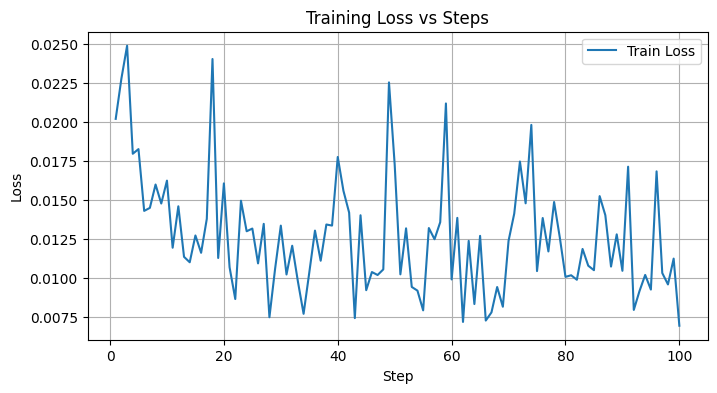


Starting evaluation: 10 trials...
Task suite: libero_90
Evaluating task 0 of 90
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
Task: close the top drawer of the cabinet


Task 0:   0%|          | 0/10 [00:00<?, ?it/s]

Episode 1 of 10


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.


  Episodes: 1, Successes: 0 (0.0%)
Episode 2 of 10
  Episodes: 2, Successes: 0 (0.0%)
Episode 3 of 10
  Episodes: 3, Successes: 0 (0.0%)
Episode 4 of 10
  Episodes: 4, Successes: 0 (0.0%)
Episode 5 of 10
  Episodes: 5, Successes: 0 (0.0%)
Episode 6 of 10
  Episodes: 6, Successes: 0 (0.0%)
Episode 7 of 10
  Episodes: 7, Successes: 1 (14.3%)
Episode 8 of 10
  Episodes: 8, Successes: 1 (12.5%)
Episode 9 of 10
  Episodes: 9, Successes: 2 (22.2%)
Episode 10 of 10
  Episodes: 10, Successes: 2 (20.0%)

Final Results for Task 0:
  Task: close the top drawer of the cabinet
  Episodes: 10
  Successes: 2
  Success rate: 20.0%
Number of trainable parameters: 3,353,433,872


Training:   0%|                                                                 | 0/100 [00:00<?, ?it/s]

Compiling training step (this may take a few minutes)...


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo obje

Compilation complete! Starting training...


/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/flax/core/scope.py:959: DeprecationWarning: shape requires ndarray or scalar arguments, got <class 'jax._src.api.ShapeDtypeStruct'> at position 0. In a future JAX release this will be an error.
  if jnp.shape(val) != jnp.shape(abs_val):
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo object and propagate it to this function. See https://github.com/jax-ml/jax/issues/26480 for more details.
  debug_info = debug_info or _missing_debug_info("linear_util.wrap_init")
/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/extend/linear_util.py:38: DeprecationWarning: linear_util.wrap_init is missing a DebugInfo object. This behavior is deprecated, use api_util.debug_info() to construct a proper DebugInfo obje

Step 0: loss=0.0090, grad_norm=0.2412


In [ ]:
for i in range(4):

    trained_model, train_losses  = train_model_on_fly(
        model=trained_model,
        training_set=training_iterator,
        learning_rate=2.5e-5,
        num_steps=100,  # Adjust based on your needs
        batch_size=64,
        warmup_steps=0,
        weight_decay=0.0,
        log_interval=50,
        seed=42,
    )

    # Plot losses
    plt.figure(figsize=(8,4))
    plt.plot([i+1 for i in range(len(train_losses))], train_losses, label='Train Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Steps')
    plt.grid(True)
    plt.legend()
    plt.show()

    #Eval again
    policy = create_policy(trained_model, _config.get_config("pi05_libero"), "/cluster/home/anmari/.cache/openpi/openpi-assets/checkpoints/pi05_libero")
    run_evaluation(
        policy=policy,
        task_id=0,
        num_trials=10,
        save_video=False
    )


# Test Nearest Neighbor Selection

This section tests the nearest neighbor fetcher to retrieve similar samples from the FAISS index.

In [12]:
# Import nn_fetcher and setup
from nn_fetcher import NearestNeighborFetcher
from utils import load_pi05_libero_model
from pathlib import Path


# Path to FAISS index (adjust if needed)
cache_dir = Path.home() / ".cache" / "libero_unified_faiss"
modality_str = "_".join(sorted(["image1", "image2", "text"]))
index_path = cache_dir / f"libero_unified_faiss_index_{modality_str}.index"
metadata_path = cache_dir / f"libero_unified_faiss_metadata_{modality_str}.pkl"

print(f"Index path: {index_path}")
print(f"Metadata path: {metadata_path}")
print(f"Index exists: {index_path.exists()}")
print(f"Metadata exists: {metadata_path.exists()}")

model, config = load_pi05_libero_model()

# Initialize fetcher
if index_path.exists() and metadata_path.exists():
    nn_fetcher = NearestNeighborFetcher(
        index_path=str(index_path),
        metadata_path=str(metadata_path),
        model=model,
    )
    print("✓ NearestNeighborFetcher initialized successfully!")
else:
    print("⚠ Index files not found. Please run build_unified_faiss_index.py first.")
    nn_fetcher = None

Index path: /cluster/home/anmari/.cache/libero_unified_faiss/libero_unified_faiss_index_image1_image2_text.index
Metadata path: /cluster/home/anmari/.cache/libero_unified_faiss/libero_unified_faiss_metadata_image1_image2_text.pkl
Index exists: True
Metadata exists: True
Loading FAISS index from /cluster/home/anmari/.cache/libero_unified_faiss/libero_unified_faiss_index_image1_image2_text.index...
Loading metadata from /cluster/home/anmari/.cache/libero_unified_faiss/libero_unified_faiss_metadata_image1_image2_text.pkl...
Loaded index with 273408 samples
Modalities: ['image1', 'image2', 'text']
Embedding dimensions: {'image1': 2048, 'image2': 2048, 'text': 2048, 'total': 6144}
✓ Created JIT-compiled embedding functions
✓ NearestNeighborFetcher initialized successfully
✓ NearestNeighborFetcher initialized successfully!


In [13]:
# Test neighbor selection with a sample from the dataset
if nn_fetcher is not None:
    # Get a sample observation from the dataloader
    config = dataclasses.replace(config, batch_size=1)
    test_dataloader = _data_loader.create_data_loader(
        config,
        sharding=None,
        shuffle=False,
    )

    # Get first batch
    for batch in test_dataloader:
        observation, actions = batch
        break

    print("Sample observation keys:", observation.images.keys() if hasattr(observation, 'images') else "N/A")
    print("Tokenized prompt shape:", observation.tokenized_prompt.shape if hasattr(observation, 'tokenized_prompt') and observation.tokenized_prompt is not None else "N/A")

else:
    print("Skipping test - nn_fetcher not initialized")

The dataset you requested (physical-intelligence/libero) is in 2.0 format.
While current version of LeRobot is backward-compatible with it, the version of your dataset still uses global
stats instead of per-episode stats. Update your dataset stats to the new format using this command:
```
python lerobot/common/datasets/v21/convert_dataset_v20_to_v21.py --repo-id=physical-intelligence/libero
```

If you encounter a problem, contact LeRobot maintainers on [Discord](https://discord.com/invite/s3KuuzsPFb)
or open an [issue on GitHub](https://github.com/huggingface/lerobot/issues/new/choose).

The dataset you requested (physical-intelligence/libero) is in 2.0 format.
While current version of LeRobot is backward-compatible with it, the version of your dataset still uses global
stats instead of per-episode stats. Update your dataset stats to the new format using this command:
```
python lerobot/common/datasets/v21/convert_dataset_v20_to_v21.py --repo-id=physical-intelligence/libero
```

If yo

Resolving data files:   0%|          | 0/1693 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/70 [00:00<?, ?it/s]

Sample observation keys: dict_keys(['base_0_rgb', 'left_wrist_0_rgb', 'right_wrist_0_rgb'])
Tokenized prompt shape: (1, 200)


In [14]:
# Test fetching neighbors
print("\n" + "="*70)
print("Fetching top-10 nearest neighbors...")
print("="*70)

distances, indices, metadata = nn_fetcher.fetch_neighbors(
    observation=observation,
    use_modalities=["image1", "image2", "text"],  # Use all modalities
    k=10,
)

print(f"\nTop-10 nearest neighbors:")
for i, (dist, idx, meta) in enumerate(zip(distances[:10], indices[:10], metadata[:10])):
    print(f"  {i+1}. Distance: {dist:.4f}, Sample index: {meta.get('sample_idx', 'N/A')}, Batch: {meta.get('batch_idx', 'N/A')}")

print(f"\nSimilarity range: {distances[0]:.4f} (best) to {distances[-1]:.4f} (worst)")


Fetching top-10 nearest neighbors...
<class 'jaxlib.xla_extension.ArrayImpl'>


E0121 16:44:32.509789 1296604 pjrt_stream_executor_client.cc:3077] Execution of replica 0 failed: INTERNAL: Failed to allocate 1053294592 bytes for new constant


XlaRuntimeError: INTERNAL: Failed to allocate 1053294592 bytes for new constant

In [7]:
# Test fetching neighbors with different modality combinations
if nn_fetcher is not None:
    print("="*70)
    print("Testing different modality combinations")
    print("="*70)

    # Test with only image1
    print("\n1. Using only image1 (base camera):")
    distances_img1, indices_img1, metadata_img1 = nn_fetcher.fetch_neighbors(
        observation=observation,
        use_modalities=["image1"],
        k=5,
    )
    print("   Top-5 (image1):")
    for i, (dist, idx, meta) in enumerate(zip(distances_img1, indices_img1, metadata_img1)):
        print(f"     {i+1}. Distance: {dist:.4f}, Sample idx: {meta.get('sample_idx', 'N/A')}, Batch: {meta.get('batch_idx', 'N/A')}")

    # Test with only image2
    print("\n2. Using only image2 (wrist camera):")
    distances_img2, indices_img2, metadata_img2 = nn_fetcher.fetch_neighbors(
        observation=observation,
        use_modalities=["image2"],
        k=5,
    )
    print("   Top-5 (image2):")
    for i, (dist, idx, meta) in enumerate(zip(distances_img2, indices_img2, metadata_img2)):
        print(f"     {i+1}. Distance: {dist:.4f}, Sample idx: {meta.get('sample_idx', 'N/A')}, Batch: {meta.get('batch_idx', 'N/A')}")

    # Test with only text
    print("\n3. Using only text:")
    distances_text, indices_text, metadata_text = nn_fetcher.fetch_neighbors(
        observation=observation,
        use_modalities=["text"],
        k=5,
    )
    print("   Top-5 (text):")
    for i, (dist, idx, meta) in enumerate(zip(distances_text, indices_text, metadata_text)):
        print(f"     {i+1}. Distance: {dist:.4f}, Sample idx: {meta.get('sample_idx', 'N/A')}, Batch: {meta.get('batch_idx', 'N/A')}")

    # Test with image1 + image2
    print("\n4. Using image1 + image2:")
    distances_img12, indices_img12, metadata_img12 = nn_fetcher.fetch_neighbors(
        observation=observation,
        use_modalities=["image1", "image2"],
        k=5,
    )
    print("   Top-5 (image1 + image2):")
    for i, (dist, idx, meta) in enumerate(zip(distances_img12, indices_img12, metadata_img12)):
        print(f"     {i+1}. Distance: {dist:.4f}, Sample idx: {meta.get('sample_idx', 'N/A')}, Batch: {meta.get('batch_idx', 'N/A')}")

    # Compare results
    print("\n" + "="*70)
    print("Comparison:")
    print(f"  Image1 only (best): {distances_img1[0]:.4f}, Sample idx: {metadata_img1[0].get('sample_idx', 'N/A')}, Batch: {metadata_img1[0].get('batch_idx', 'N/A')}")
    print(f"  Image2 only (best): {distances_img2[0]:.4f}, Sample idx: {metadata_img2[0].get('sample_idx', 'N/A')}, Batch: {metadata_img2[0].get('batch_idx', 'N/A')}")
    print(f"  Text only (best): {distances_text[0]:.4f}, Sample idx: {metadata_text[0].get('sample_idx', 'N/A')}, Batch: {metadata_text[0].get('batch_idx', 'N/A')}")
    print(f"  Image1+2 (best): {distances_img12[0]:.4f}, Sample idx: {metadata_img12[0].get('sample_idx', 'N/A')}, Batch: {metadata_img12[0].get('batch_idx', 'N/A')}")
    print(f"  All modalities (best): {distances[0]:.4f}, Sample idx: {metadata[0].get('sample_idx', 'N/A')}, Batch: {metadata[0].get('batch_idx', 'N/A')}")
else:
    print("Skipping test - nn_fetcher not initialized")

Testing different modality combinations

1. Using only image1 (base camera):
   Top-5 (image1):
     1. Distance: 0.4477, Sample idx: 227508, Batch: 1777
     2. Distance: 0.4476, Sample idx: 227507, Batch: 1777
     3. Distance: 0.4475, Sample idx: 227509, Batch: 1777
     4. Distance: 0.4472, Sample idx: 227510, Batch: 1777
     5. Distance: 0.4470, Sample idx: 227501, Batch: 1777

2. Using only image2 (wrist camera):
   Top-5 (image2):
     1. Distance: 0.4397, Sample idx: 224924, Batch: 1757
     2. Distance: 0.4393, Sample idx: 48064, Batch: 375
     3. Distance: 0.4382, Sample idx: 224923, Batch: 1757
     4. Distance: 0.4373, Sample idx: 224925, Batch: 1757
     5. Distance: 0.4366, Sample idx: 48065, Batch: 375

3. Using only text:


E0121 15:59:51.281202 1293146 pjrt_stream_executor_client.cc:3077] Execution of replica 0 failed: INTERNAL: Failed to allocate 1053294592 bytes for new constant


XlaRuntimeError: INTERNAL: Failed to allocate 1053294592 bytes for new constant

In [ ]:
# Import TTT evaluation function
policy_ttt = create_policy(
    model,
    config,
    checkpoint_dir,
    rng_seed=42,  # For reproducibility
)
print("✓ Policy created for TTT evaluation")

✓ Policy created for TTT evaluation


In [ ]:
dataloader = _data_loader.create_data_loader(
    config,
    sharding=None,
    shuffle=False,
)

# Get the underlying dataset
ttt_dataset = dataloader._data_loader._data_loader.dataset
print(f"TTT dataset size: {len(ttt_dataset)} samples")
print("✓ TTT dataloader created")

TTT dataset size: 273465 samples
✓ TTT dataloader created


In [ ]:
# Run TTT evaluation
from importlib import reload
import utils
reload(utils)

print("="*70)
print("Running TTT Evaluation")
print("="*70)
print("This will perform periodic fine-tuning during evaluation using nearest neighbors.")
print("Note: This may take a while depending on ttt_frequency and ttt_num_steps.")
print("="*70)

success_rate = run_evaluation_ttt(
    policy=policy_ttt,
    nn_fetcher=nn_fetcher,
    train_config=config,
    dataset=ttt_dataset,  # Dataset for indexing retrieved samples
    num_trials=5,  # Reduced for testing
    task_suite_name="libero_10",
    task_id=8,
    save_video=False,  # Set to True to save videos
    seed=42,
    ttt_num_steps=1,  # Number of gradient steps per TTT update
    ttt_frequency=50,  # Perform TTT every N steps during rollout
    learning_rate=2.5e-4,
    ttt_k=1,  # Number of nearest neighbors to retrieve
    ttt_use_modalities=["image1", "image2", "text"],  # Modalities for retrieval
)

print(f"\n{'='*70}")
print(f"TTT Evaluation Complete!")
print(f"Success Rate: {success_rate*100:.1f}%")
print(f"{'='*70}")


Running TTT Evaluation
This will perform periodic fine-tuning during evaluation using nearest neighbors.
Note: This may take a while depending on ttt_frequency and ttt_num_steps.

Starting TTT evaluation: 5 trials (seed=42)...
TTT settings: 1 steps every 50 rollout steps
[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Task suite: libero_10
Evaluating task 8 of 10
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
[Warning]: datasets path /cluster/home/anmari/meta_vlas/third_party/libero/libero/libero/../datasets does not exist!
Task: put both moka pots on the stove


Task 8:   0%|          | 0/5 [00:00<?, ?it/s]

Episode 1 of 5
Error in episode 1: INVALID_ARGUMENT: Buffer has been deleted or donated.
  Episodes: 1, Successes: 0 (0.0%)
Episode 2 of 5


Traceback (most recent call last):
  File "<string>", line 146, in run_evaluation_ttt
  File "/cluster/home/anmari/meta_vlas/src/openpi/policies/policy.py", line 100, in infer
    outputs = jax.tree.map(lambda x: np.asarray(x[0, ...]), outputs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree.py", line 155, in map
    return tree_util.tree_map(f, tree, *rest, is_leaf=is_leaf)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in tree_map
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in <genexpr>
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
                 

Error in episode 2: INVALID_ARGUMENT: Buffer has been deleted or donated.
  Episodes: 2, Successes: 0 (0.0%)
Episode 3 of 5


Traceback (most recent call last):
  File "<string>", line 146, in run_evaluation_ttt
  File "/cluster/home/anmari/meta_vlas/src/openpi/policies/policy.py", line 100, in infer
    outputs = jax.tree.map(lambda x: np.asarray(x[0, ...]), outputs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree.py", line 155, in map
    return tree_util.tree_map(f, tree, *rest, is_leaf=is_leaf)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in tree_map
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in <genexpr>
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
                 

Error in episode 3: INVALID_ARGUMENT: Buffer has been deleted or donated.
  Episodes: 3, Successes: 0 (0.0%)
Episode 4 of 5


Traceback (most recent call last):
  File "<string>", line 146, in run_evaluation_ttt
  File "/cluster/home/anmari/meta_vlas/src/openpi/policies/policy.py", line 100, in infer
    outputs = jax.tree.map(lambda x: np.asarray(x[0, ...]), outputs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree.py", line 155, in map
    return tree_util.tree_map(f, tree, *rest, is_leaf=is_leaf)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in tree_map
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in <genexpr>
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
                 

Error in episode 4: INVALID_ARGUMENT: Buffer has been deleted or donated.
  Episodes: 4, Successes: 0 (0.0%)
Episode 5 of 5


Traceback (most recent call last):
  File "<string>", line 146, in run_evaluation_ttt
  File "/cluster/home/anmari/meta_vlas/src/openpi/policies/policy.py", line 100, in infer
    outputs = jax.tree.map(lambda x: np.asarray(x[0, ...]), outputs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree.py", line 155, in map
    return tree_util.tree_map(f, tree, *rest, is_leaf=is_leaf)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in tree_map
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in <genexpr>
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
                 

Error in episode 5: INVALID_ARGUMENT: Buffer has been deleted or donated.
  Episodes: 5, Successes: 0 (0.0%)

Final TTT Results for Task 8:
  Task: put both moka pots on the stove
  Episodes: 5
  Successes: 0
  Success rate: 0.0%
  Total TTT updates: 0

TTT Evaluation Complete!
Success Rate: 0.0%


Traceback (most recent call last):
  File "<string>", line 146, in run_evaluation_ttt
  File "/cluster/home/anmari/meta_vlas/src/openpi/policies/policy.py", line 100, in infer
    outputs = jax.tree.map(lambda x: np.asarray(x[0, ...]), outputs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree.py", line 155, in map
    return tree_util.tree_map(f, tree, *rest, is_leaf=is_leaf)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in tree_map
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/cluster/home/anmari/meta_vlas/.venv/lib/python3.11/site-packages/jax/_src/tree_util.py", line 358, in <genexpr>
    return treedef.unflatten(f(*xs) for xs in zip(*all_leaves))
                 

Process SpawnProcess-2:
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/cluster/software/stacks/2024-06/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-12.2.0/python-3.11.6-ukhwpjnwzzzizek3pgr75zkbhxros5fq/lib/python3.11/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
  File "/cluster/software/stacks/2024-06/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-12.2.0/python-3.11.6-ukhwpjnwzzzizek3pgr75zkbhxros5fq/lib/python3.11/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/cluster/software/stacks/2024-06/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-12.2.0/python-3.11.6-ukhwpjnwzzzizek3pgr75zkbhxros5fq/lib/python3.11/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/cluster/software/stacks/2024-06/spack/opt/spack/linux-ubuntu22.04-x86_64_v3/gcc-12.2.0/python-3.11.6-ukhwpjnwzzzizek3pgr75zkbhxros5fq/lib/python3.11/multiprocessing/util.py", line 224, in __call__
    res = s

In [ ]:
# Compare TTT vs standard evaluation
print("="*70)
print("Comparison: Standard vs TTT Evaluation")
print("="*70)

# Standard evaluation (for comparison)
print("\n1. Running standard evaluation (no TTT)...")
from utils import run_evaluation

standard_policy = create_policy(
    trained_model,
    config,
    checkpoint_dir,
    rng_seed=42,
)

standard_success = run_evaluation(
    policy=standard_policy,
    task_id=0,
    num_trials=5,
    save_video=False,
)

print(f"\nStandard evaluation success rate: {standard_success*100:.1f}%")

# TTT evaluation (already run above)
if nn_fetcher is not None:
    print(f"\nTTT evaluation success rate: {success_rate*100:.1f}%")
    print(f"\nImprovement: {(success_rate - standard_success)*100:.1f} percentage points")
else:
    print("\nTTT evaluation not run (nn_fetcher not available)")

print("="*70)

In [ ]:
# Test different TTT configurations
if nn_fetcher is not None:
    print("="*70)
    print("Testing Different TTT Configurations")
    print("="*70)

    # Test with different TTT frequencies
    ttt_configs = [
        {"ttt_frequency": 25, "ttt_num_steps": 3, "name": "Frequent, Few Steps"},
        {"ttt_frequency": 50, "ttt_num_steps": 5, "name": "Moderate"},
        {"ttt_frequency": 100, "ttt_num_steps": 10, "name": "Rare, Many Steps"},
    ]

    results = []

    for ttt_config in ttt_configs:
        print(f"\nTesting: {ttt_config['name']}")
        print(f"  TTT frequency: {ttt_config['ttt_frequency']}")
        print(f"  TTT steps: {ttt_config['ttt_num_steps']}")

        # Create fresh policy for each test
        test_policy = create_policy(
            trained_model,
            config,
            checkpoint_dir,
            rng_seed=42,
        )

        success = run_evaluation_ttt(
            policy=test_policy,
            nn_fetcher=nn_fetcher,
            train_config=config,
            dataset=ttt_dataset,
            num_trials=3,  # Quick test
            task_id=0,
            seed=42,
            ttt_frequency=ttt_config['ttt_frequency'],
            ttt_num_steps=ttt_config['ttt_num_steps'],
            learning_rate=2.5e-5,
            warmup_steps=2,
            ttt_k=20,
            ttt_batch_size=8,
            save_video=False,
        )

        results.append({
            "config": ttt_config['name'],
            "success_rate": success,
        })

        print(f"  Success rate: {success*100:.1f}%")

    # Summary
    print("\n" + "="*70)
    print("Summary of TTT Configurations:")
    print("="*70)
    for result in results:
        print(f"{result['config']}: {result['success_rate']*100:.1f}%")
else:
    print("⚠ Skipping TTT configuration tests - nn_fetcher not initialized")